<a href="https://colab.research.google.com/github/sdiaz8/sdiaz8/blob/main/Visualizations_with_NDFootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the NDFootballScore file to answer the following questions. Each question answer should be displayed. The meaning of some of the variables are described below.
* Season = the year the game was played
* Site = Home or Away game
* ND Coach = ND Coach's name
* W/L/T = Win, Loss or Tie


<h3> You may need to recode some variables like W/L/T etc. so that the results are meaningful. Ensure there are sufficient comments in what you are doing.  For example, if there are multiple things asked in one question, separate it out with adequate comments. 

### 1. Load and explore the data. Remove unnecessary columns to only retain "Season, W/L/T, Score, and Opponent". Rename the `W/L/T` column to `result`. Make all the column names lowercase 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nd_df = pd.read_csv('/content/NDFootballScore.csv')

In [ ]:
nd_df.head()

,Season,Site,Month,Day,Year,ND Coach,W/L/T,Score,ND Rank,Opponent,Opp. Coach,Opp. Rank
0,1887,HOME,NOV,23,1887,NO COACH,L,0-8,No Poll,MICHIGAN,NO COACH,No Poll
1,1888,HOME,APR,20,1888,NO COACH,L,6-26,No Poll,MICHIGAN,NO COACH,No Poll
2,1888,HOME,APR,21,1888,NO COACH,L,4-10,No Poll,MICHIGAN,NO COACH,No Poll
3,1888,HOME,DEC,6,1888,NO COACH,W,20-0,No Poll,HARVARD PREP,UNKNOWN,No Poll
4,1889,AWAY,NOV,14,1889,NO COACH,W,9-0,No Poll,NORTHWESTERN,NO COACH,No Poll


In [ ]:
nd_df = nd_df.drop(['Month', 'Day', 'Year', 'ND Coach', 'ND Rank', 'Opp. Coach', 'Opp. Rank'], axis=1)
nd_df = nd_df.rename({'Season':'season', 'Site':'site','W/L/T':'result','Score':'score','Opponent':'opponent'}, axis = 1)
nd_df

,season,site,result,score,opponent
0,1887,HOME,L,0-8,MICHIGAN
1,1888,HOME,L,6-26,MICHIGAN
2,1888,HOME,L,4-10,MICHIGAN
3,1888,HOME,W,20-0,HARVARD PREP
4,1889,AWAY,W,9-0,NORTHWESTERN
...,...,...,...,...,...
1257,2016,HOME,L,31-34,VIRGINIA TECH
1258,2016,AWAY,L,27-45,SOUTHERN CAL
1259,2017,HOME,W,49-16,TEMPLE
1260,2017,HOME,L,19-20,GEORGIA


### 2. Use Boolean Indexing (Boolean Selection) to calculate ND's all-time winning percentage.  Store the result in the variable **all_time_win_pct**. 
* Using f strings, print: *"Notre Dame Football's all time winning percentage is XX.X%."*



$$\text{all-time winning pct} = \frac{\text{ # of wins}}{\text{# games played} - \text{# of ties}}$$

In [ ]:
wins = nd_df[nd_df.result == "W"]
ties = nd_df[nd_df.result == "T"]

In [ ]:
all_time_win_pct = round(((len(wins))/(len(nd_df)-len(ties)))*100,1)
"Notre Dame Football's all time winning percentage is {}%.".format(all_time_win_pct)

"Notre Dame Football's all time winning percentage is 73.5%."

### 3. What is the Average Margin of Victory
The formula for Avg Margin of Victory is as follows.

avg_mov = (sum(nd_score) - sum(opp_score)) / num_wins

Answer the following questions:

1. For all of the games that Notre Dame won, what was the avg margin of victory?
2. For games played in the 1999 season, what was the avg margin of victory?

Note: This requires you to create two new columns `nd_score` and `opp_score`

In [ ]:
split_scores= nd_df["score"].str.split("-", n = 1, expand = True)
nd_df['nd_score'] = split_scores[0].astype(int)
nd_df['opp_score'] = split_scores[1].astype(int)
nd_df

,season,site,result,score,opponent,nd_score,opp_score
0,1887,HOME,L,0-8,MICHIGAN,0,8
1,1888,HOME,L,6-26,MICHIGAN,6,26
2,1888,HOME,L,4-10,MICHIGAN,4,10
3,1888,HOME,W,20-0,HARVARD PREP,20,0
4,1889,AWAY,W,9-0,NORTHWESTERN,9,0
...,...,...,...,...,...,...,...
1257,2016,HOME,L,31-34,VIRGINIA TECH,31,34
1258,2016,AWAY,L,27-45,SOUTHERN CAL,27,45
1259,2017,HOME,W,49-16,TEMPLE,49,16
1260,2017,HOME,L,19-20,GEORGIA,19,20


In [ ]:
nd_score_sum = nd_df['nd_score'].sum()
opp_score_sum = nd_df['opp_score'].sum()
avg_mov = ((nd_score_sum-opp_score_sum)/len(wins)).round(2)
print("Notre Dame Football's all time average margin of victory is {} points.".format(avg_mov))

Notre Dame Football's all time average margin of victory is 18.2 points.


In [ ]:
ninety_nine_season = nd_df[nd_df.season == 1999]
ninety_nine_wins = ninety_nine_season[ninety_nine_season.result == "W"]
ninety_nine_nd_score = ninety_nine_season['nd_score'].sum()
ninety_nine_opp_score = ninety_nine_season['opp_score'].sum()
ninety_nine_avg_mov = ((ninety_nine_nd_score-ninety_nine_opp_score)/len(ninety_nine_wins)).round(2)
print("Notre Dame Football's 1999 average margin of victory was {} points.".format(ninety_nine_avg_mov))

Notre Dame Football's 1999 average margin of victory was 3.4 points.


### 4. Create Plots for the following:

1. Histogram of the nd_score using 100 bins
2. Boxplot for the nd_score and opp_score on the same chart
3. Plot the top 10 teams by the number of games played

Text(0.5, 0, 'Scores')

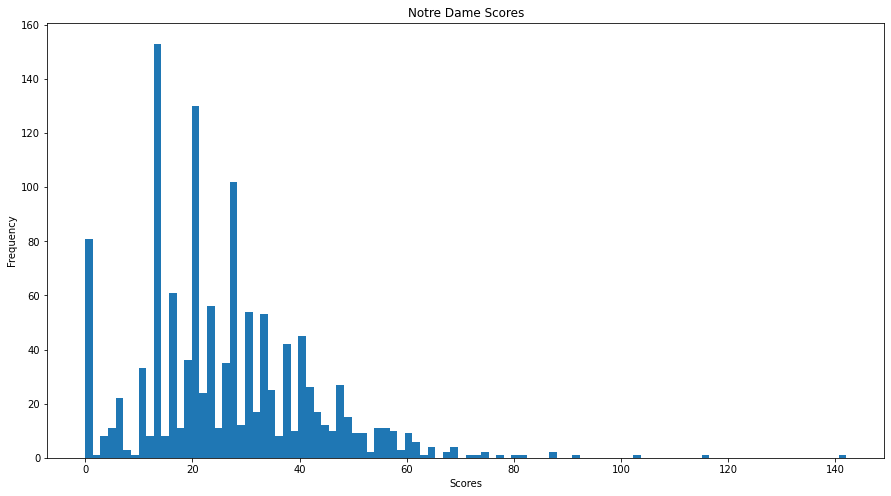

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(nd_df['nd_score'],bins=100)
plt.title("Notre Dame Scores")
plt.ylabel("Frequency")
plt.xlabel("Scores")

Text(0, 0.5, 'Notre Dame vs. Opponents')

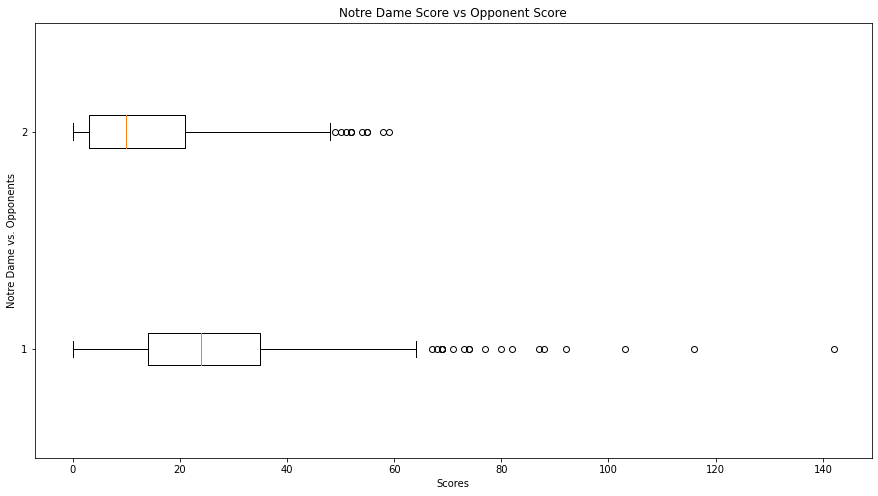

In [ ]:
scores = [nd_df['nd_score'],nd_df['opp_score']]
plt.figure(figsize=(15,8))
plt.boxplot(scores, vert=False)
plt.title("Notre Dame Score vs Opponent Score")
plt.xlabel("Scores")
plt.ylabel("Notre Dame vs. Opponents")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

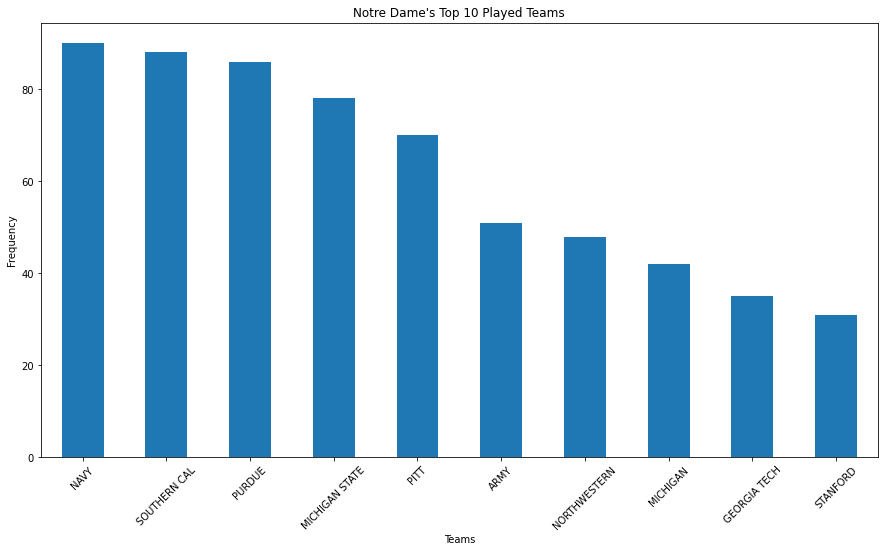

In [ ]:
top_ten = nd_df['opponent'].value_counts()[:10]
plt.figure(figsize=(15,8))
top_ten.plot.bar()
plt.title("Notre Dame's Top 10 Played Teams")
plt.ylabel("Frequency")
plt.xlabel("Teams")
plt.xticks(rotation=45)